In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
time_columns = ["classification_time", "summarization_time", "cutoff_time", "sampling_time", "encoding_time",
                "shard_time", "rowstore_time", "order1_time", "order2_time", "order3_time"]
metadata_columns = ["num_results", "num_encoded"]
acc_columns = ["recall", "precision"]

def plot_results(results_file):
    results = pd.read_csv(results_file)
    grouped_results = results.groupby(["sample_rate", "outlier_sample_fraction"]).mean().reset_index(col_level=0)
    for outlier_fraction in grouped_results["outlier_sample_fraction"].unique():
        data = grouped_results[grouped_results["outlier_sample_fraction"] == outlier_fraction]
        plt.figure(figsize=(15,5))
        plt.subplot(131)
        _ = plt.plot(data["sample_rate"], data[time_columns])
#         plt.xscale('log')
#         plt.yscale('log')
        plt.legend(time_columns)
        plt.title("Outlier Sample Fraction: " + str(outlier_fraction))
        plt.subplot(132)
        _ = plt.plot(data["sample_rate"], data[metadata_columns])
        plt.legend(metadata_columns)
        plt.title("Outlier Sample Fraction: " + str(outlier_fraction))
        plt.subplot(133)
        _ = plt.plot(data["sample_rate"], data[acc_columns])
        plt.legend(acc_columns)
        plt.title("Outlier Sample Fraction: " + str(outlier_fraction))

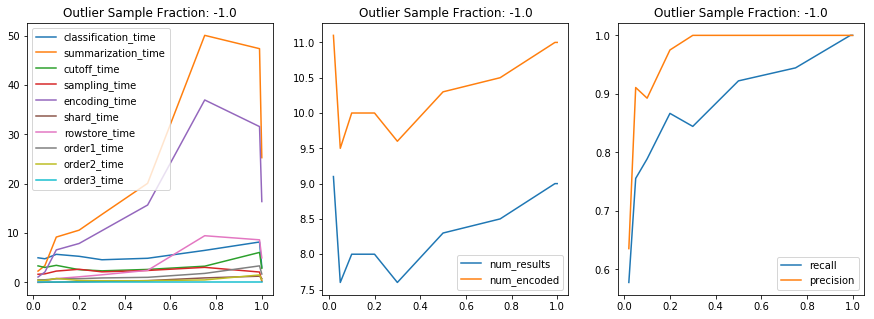

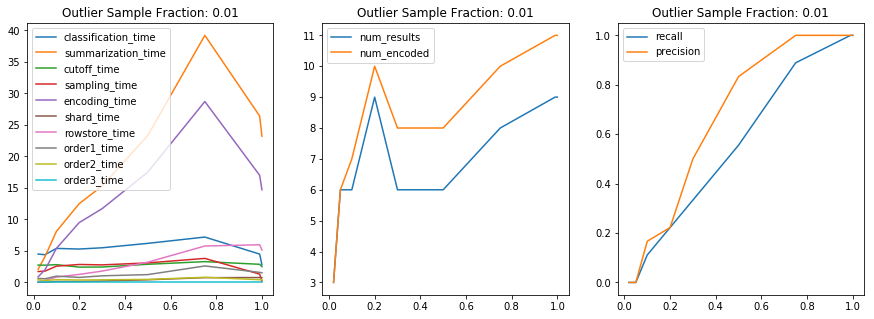

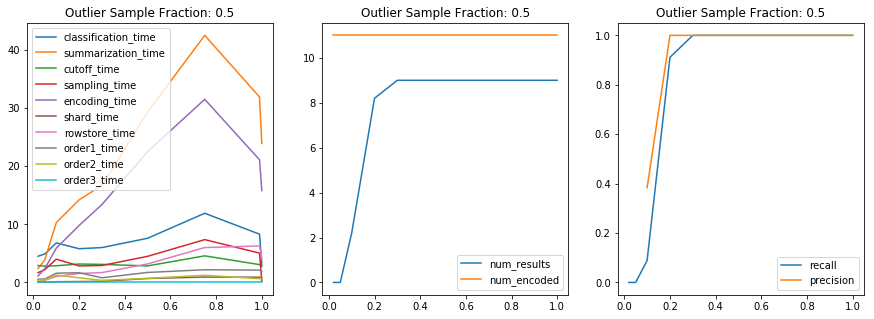

In [56]:
plot_results("lib/results/sampling_1524271320.csv")